In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from scipy.stats import uniform, randint
from skfeature.function.similarity_based import fisher_score
from scipy.stats import chi2_contingency
import joblib

In [74]:
audio_path='Data/genres_original/blues/blues.00000.wav'
y, sr = librosa.load(audio_path)

In [75]:
len(y)

661794

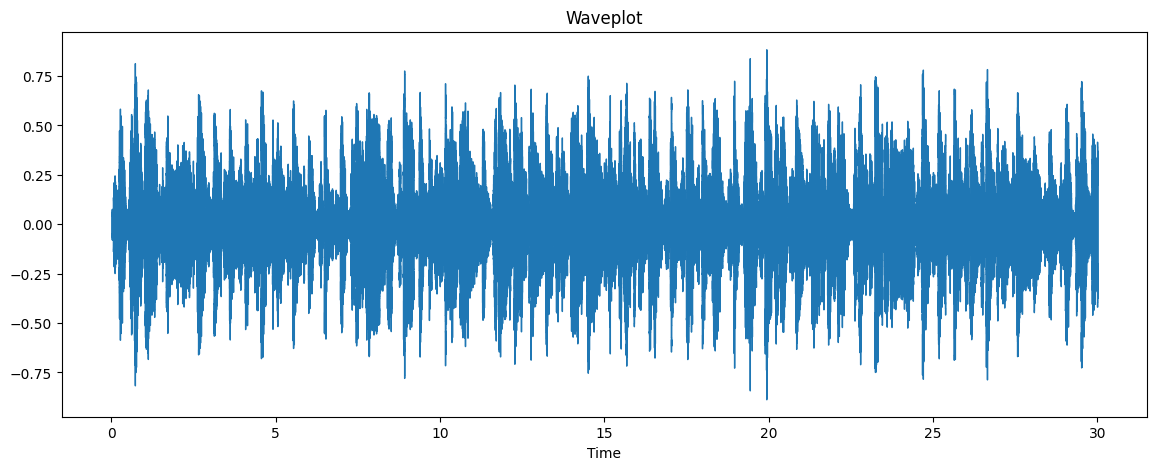

In [76]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

plt.title('Waveplot')
plt.show()


In [77]:
data_1 = pd.read_csv('Data/features_30_sec.csv')
data_1.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues




    Chroma STFT (Short-Time Fourier Transform): Measures the intensity of different pitches in a music track, providing a representation of the audio in terms of its harmonic content across 12 different pitch classes.

    RMS (Root Mean Square) Mean: Indicates the average power or loudness of the audio signal.

    Spectral Centroid Mean: Represents the "center of mass" of the spectrum, giving a sense of the brightness of a sound.

    Spectral Bandwidth Mean: Measures the width of the band of light at half the peak maximum and effectively indicates the range of frequencies present in the sound.

    Rolloff Mean: The frequency below which a specified percentage (typically 85% to 95%) of the total spectral energy lies, highlighting the shape of the audio spectrum.

    Zero Crossing Rate Mean: The rate at which the signal changes signs, which can indicate the noisiness or the complexity of a sound.

    Harmony Mean: Extracts the harmonic components of the audio, which are important for the perception of musical notes.

    Perceptual Sharpness Mean: Measures the sharpness or brightness of the audio, which affects how listeners perceive the "edge" or clarity of a sound.

    Tempo: The speed at which a piece of music is played, calculated in beats per minute (BPM).

    MFCC (Mel Frequency Cepstral Coefficients) Mean: Describes the overall shape of the spectral envelope and is widely used in audio signal processing and speech recognition for timbre and speech clarity characterization.


In [78]:
def chroma_stft(y,sr):
    
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)
    return chroma_stft_mean,chroma_stft_var

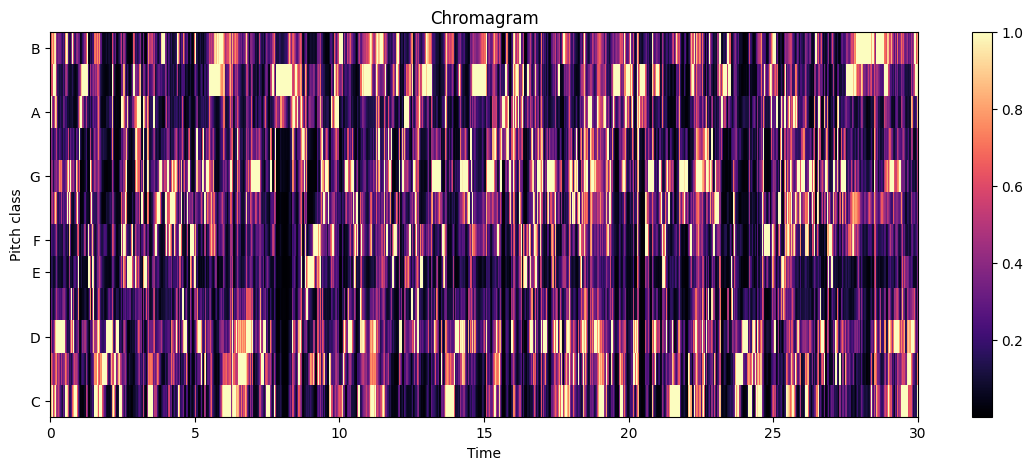

Chroma_stft_mean: 0.3501285
Chroma_stft_var: 0.08877166


In [79]:
chroma_sft=librosa.feature.chroma_stft(y=y,sr=sr)
chroma_sft_mean = np.mean(chroma_sft)
chroma_sft_var = np.var(chroma_sft)
plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_sft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.show()
print('Chroma_stft_mean:',chroma_sft_mean)
print('Chroma_stft_var:',chroma_sft_var)

In [80]:
def rms(y):
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)
    return rms_mean, rms_var

In [81]:
rms = librosa.feature.rms(y=y)
rms_mean = rms.mean()
rms_var = rms.var()
print("RMS_VAR:", rms_var)
print("RMS Mean:", rms_mean)

RMS_VAR: 0.00282838
RMS Mean: 0.13018432


In [82]:
def spectral_centroid(y,sr):
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_centroid_var = np.var(spectral_centroid)
    return spectral_centroid_mean, spectral_centroid_var

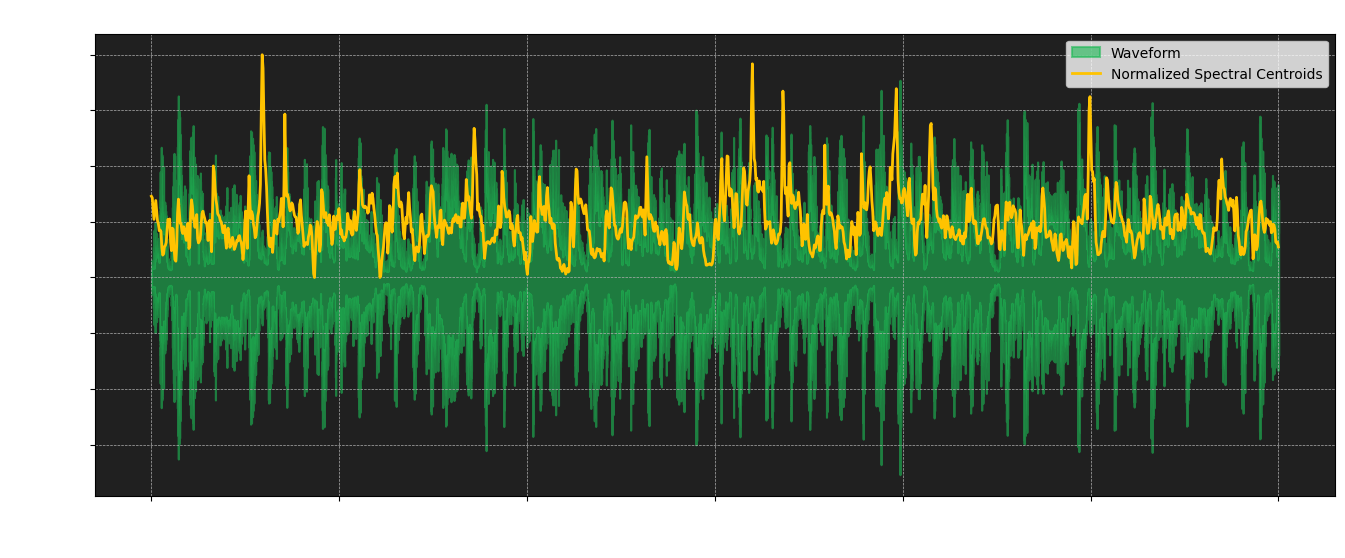

Spectral Centroid Mean: 1784.1226412753101
Spectral Centroid Variance: 129745.48441929805


In [83]:
spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
spectral_centroid_mean = spectral_centroid.mean()
spectral_centroid_var = spectral_centroid.var()
frame = range(len(spectral_centroid[0]))
t=librosa.frames_to_time(frame)
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)


plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')
librosa.display.waveshow(y, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')


plt.plot(t, normalize(spectral_centroid[0]), color='#FFC300', linewidth=2, label='Normalized Spectral Centroids')


plt.title('Waveform and Normalized Spectral Centroids', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')


plt.show()
print('Spectral Centroid Mean:',spectral_centroid_mean)
print('Spectral Centroid Variance:',spectral_centroid_var)



In [84]:
def spectral_bandwidth(y,sr):
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_var = np.var(spectral_bandwidth)
    return spectral_bandwidth_mean, spectral_bandwidth_var


In [85]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
spectral_bandwidth_mean = spectral_bandwidth.mean()
spectral_bandwidth_var = spectral_bandwidth.var()
print('Spectral Bandwidth Mean:',spectral_bandwidth_mean)
print('Spectral Bandwidth Variance:',spectral_bandwidth_var)

Spectral Bandwidth Mean: 2002.4124072733878
Spectral Bandwidth Variance: 85834.41040579003


In [86]:
def spectral_rolloff(y,sr):
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    spectral_rolloff_mean = np.mean(spectral_rolloff)
    spectral_rolloff_var = np.var(spectral_rolloff)
    return spectral_rolloff_mean, spectral_rolloff_var

In [87]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
spectral_rolloff_mean = spectral_rolloff.mean()
spectral_rolloff_var = spectral_rolloff.var()
print('Spectral Rolloff Mean:',spectral_rolloff_mean)
print('Spectral Rolloff Variance:',spectral_rolloff_var)

Spectral Rolloff Mean: 3805.7230301080335
Spectral Rolloff Variance: 901252.916706492


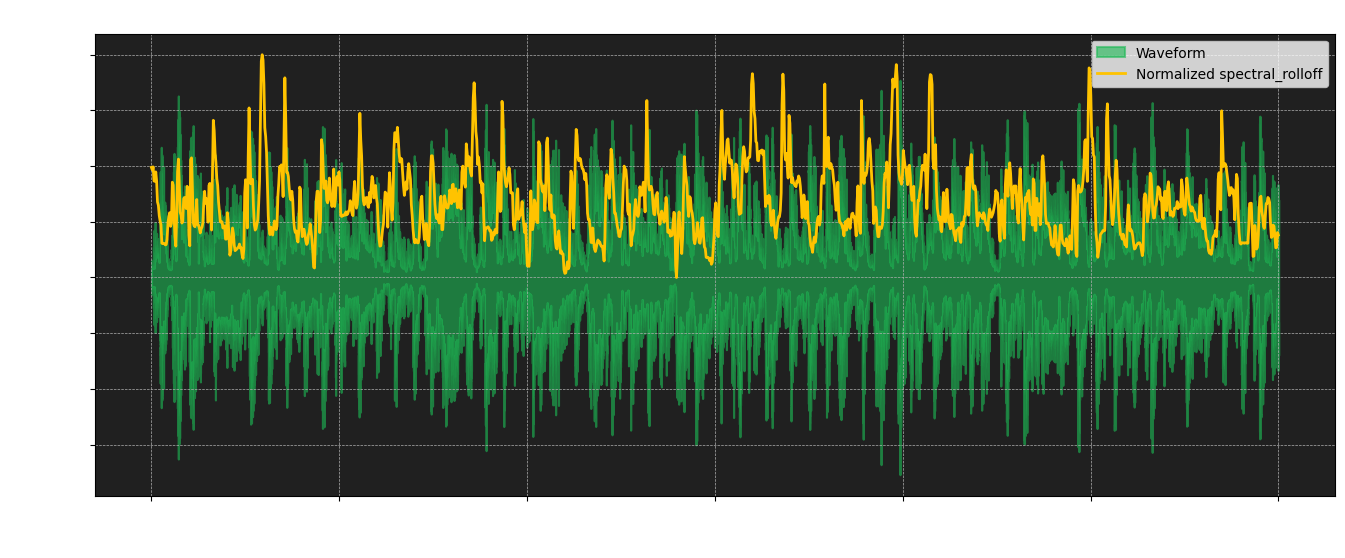

In [88]:
frames = range(len(spectral_rolloff [0]))
t = librosa.frames_to_time(frames, sr=sr)

def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)


plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  


librosa.display.waveshow(y, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

plt.plot(t, normalize(spectral_rolloff[0]), color='#FFC300', linewidth=2, label='Normalized spectral_rolloff')

plt.title('Waveform and Normalized spectral_rolloff', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

plt.show()

In [89]:
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
zero_crossing_rate_mean = zero_crossing_rate.mean()
zero_crossing_rate_var = zero_crossing_rate.var()
print('Zero Crossing Rate Mean:',zero_crossing_rate_mean)
print('Zero Crossing Rate Variance:',zero_crossing_rate_var)


Zero Crossing Rate Mean: 0.08304482066898686
Zero Crossing Rate Variance: 0.0007669456545940504


In [90]:
def zero_crossing_rate(y):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = zero_crossing_rate.mean()
    zero_crossing_rate_var = zero_crossing_rate.var()
    return zero_crossing_rate_mean, zero_crossing_rate_var

In [91]:
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
harmony_mean = np.mean(chroma_cens)
harmony_var = np.var(chroma_cens)
print('Harmony Mean:',harmony_mean)
print('Harmony Variance:',harmony_var)


Harmony Mean: 0.27226317
Harmony Variance: 0.009206081


In [92]:
def harmony(y,sr):
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    harmony_mean = np.mean(chroma_cens)
    harmony_var = np.var(chroma_cens)
    return harmony_mean, harmony_var

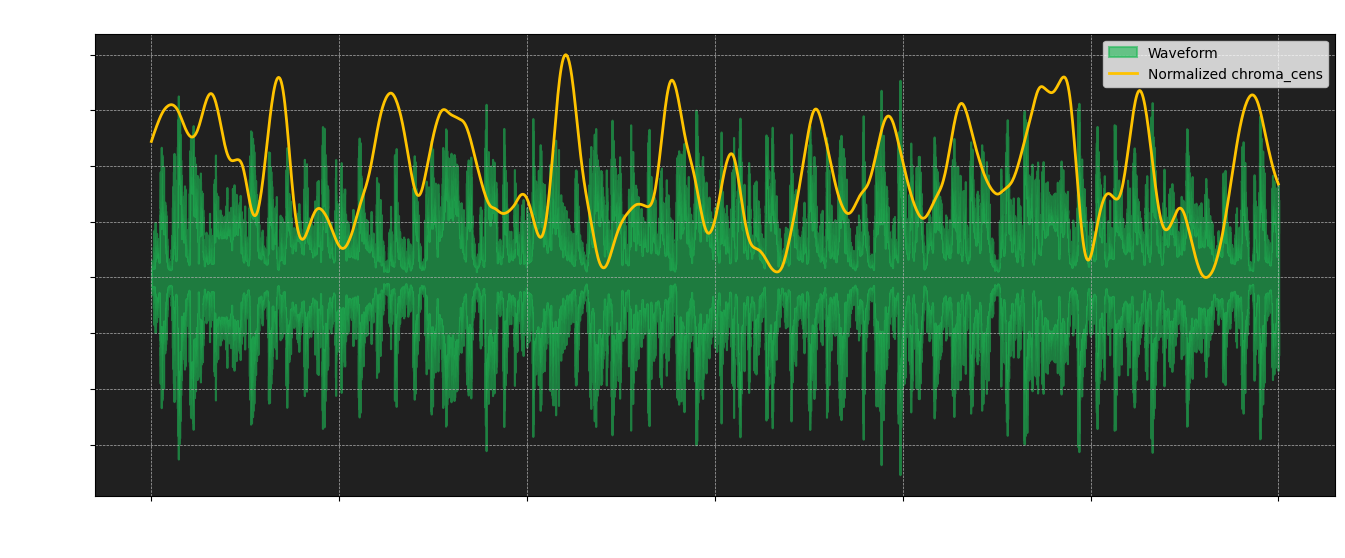

In [93]:
frames = range(len(chroma_cens[0]))
t = librosa.frames_to_time(frames, sr=sr)


def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)



plt.figure(figsize=(16, 6))
ax = plt.axes()
ax.set_facecolor('#202020')  

librosa.display.waveshow(y, sr=sr, alpha=0.6, color='#1DB954', linewidth=1.5, label='Waveform')

plt.plot(t, normalize(chroma_cens[0]), color='#FFC300', linewidth=2, label='Normalized chroma_cens')


plt.title('Waveform and Normalized chroma_cens', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')


plt.show()

In [94]:
tempo_1, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
tempo_1_mean = np.mean(tempo_1)

print('Tempo Mean:',tempo_1_mean)



Tempo Mean: 123.046875


In [95]:
def tempo(y,sr):
    tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
    tempo_mean = np.mean(tempo)
    return tempo_mean

(20, 1293)


/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


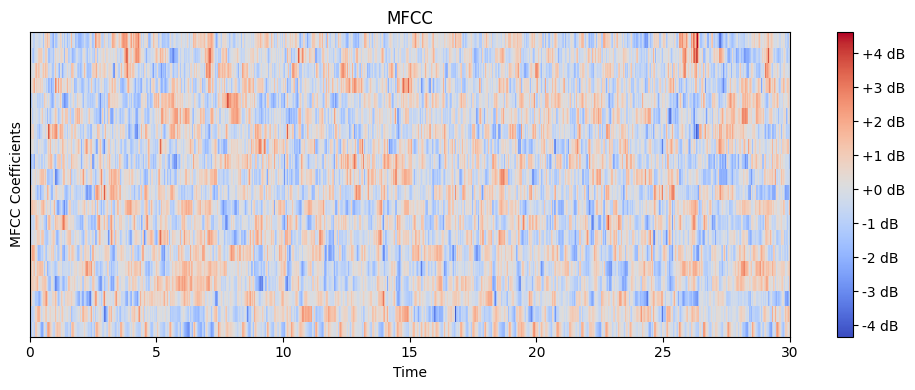

MFCC Mean: [-113.59882     121.57067     -19.162258     42.363937     -6.362263
   18.62193     -13.699731     15.3398      -12.274303     10.970943
   -8.326058      8.802087     -3.6699393     5.7446737    -5.1627812
    0.75170463   -1.6878525    -0.40873152   -2.3026755     1.222466  ]
MFCC Variance: [2569.3696    295.8471    235.58444   151.03874   167.9929     89.172424
   67.603096   69.001495   82.21985    63.346542   61.764996   51.280754
   41.2159     40.51753    49.784233   52.42454    36.535866   41.603176
   55.05366    46.941357]


In [96]:



mfccs = librosa.feature.mfcc(y=y, sr=sr)
print(mfccs.shape)
mfccs_mean = np.mean(mfccs, axis=1)
mfccs_var = np.var(mfccs, axis=1)

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)


plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()
print('MFCC Mean:',mfccs_mean)
print('MFCC Variance:',mfccs_var)


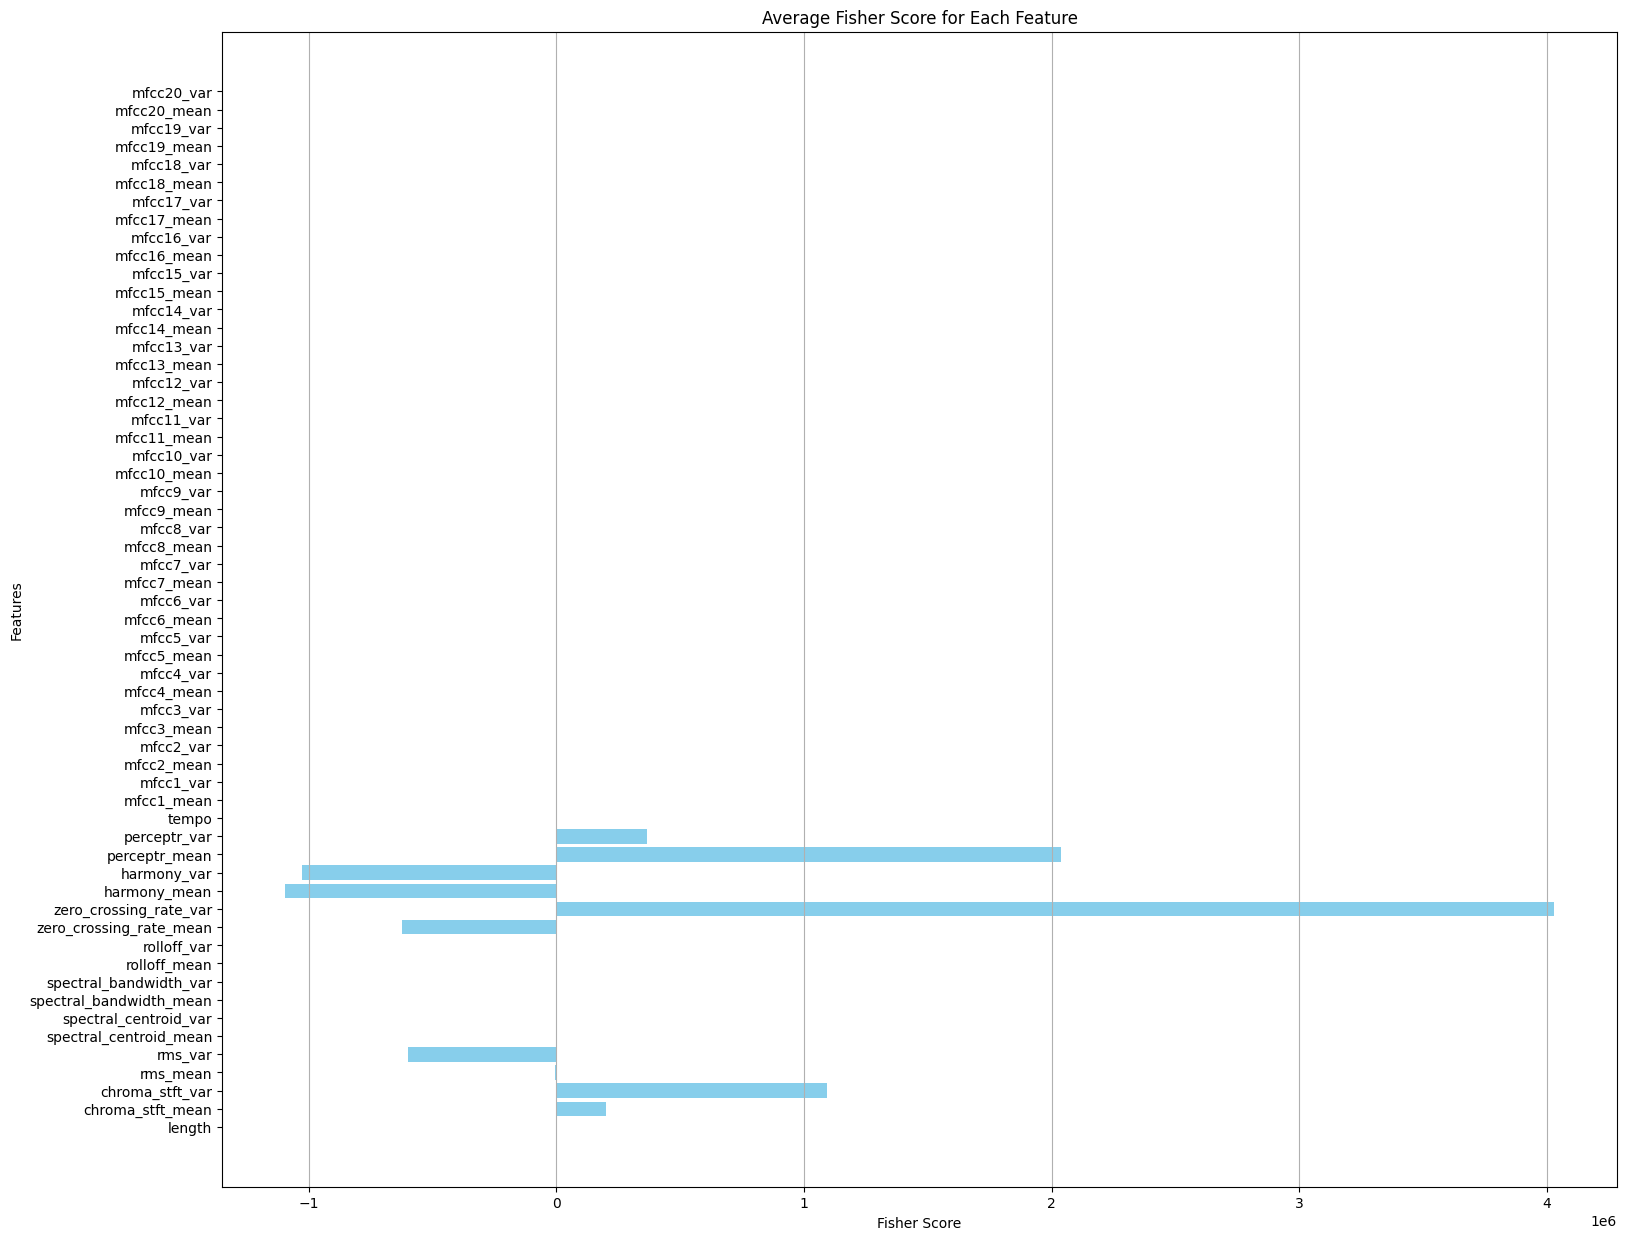

In [97]:
X = data_1.iloc[:, 1:-1]
y = data_1.iloc[:, -1]

class_means = X.groupby(y).mean()

# Calculate within-class scatter matrix (Sw)
within_class_scatter = np.zeros((X.shape[1], X.shape[1]))
for class_label, class_mean in class_means.iterrows():
    class_data = X[y == class_label]
    deviation = class_data - class_mean
    within_class_scatter += np.dot(deviation.T, deviation)

# Calculate between-class scatter matrix (Sb)
overall_mean = X.mean()
between_class_scatter = np.zeros((X.shape[1], X.shape[1]))
for class_label, class_mean in class_means.iterrows():
    n = len(X[y == class_label])
    deviation = class_mean - overall_mean
    between_class_scatter += n * np.outer(deviation, deviation)

# Calculate Fisher score
fisher_score = np.linalg.inv(within_class_scatter).dot(between_class_scatter)

# Calculate the average Fisher score for each feature
average_fisher_score = np.mean(fisher_score, axis=1)

# Plot the bar graph
plt.figure(figsize=(18,15))
plt.barh(X.columns, average_fisher_score, color='skyblue')
plt.xlabel('Fisher Score')
plt.ylabel('Features')
plt.title('Average Fisher Score for Each Feature')
plt.grid(axis='x')
plt.show()


In [98]:
data_1.shape

(1000, 60)

In [99]:
data_1.iloc[1,:]

filename                   blues.00001.wav
length                              661794
chroma_stft_mean                  0.340914
chroma_stft_var                    0.09498
rms_mean                          0.095948
rms_var                           0.002373
spectral_centroid_mean         1530.176679
spectral_centroid_var        375850.073649
spectral_bandwidth_mean        2039.036516
spectral_bandwidth_var       213843.755497
rolloff_mean                   3550.522098
rolloff_var                 2977893.388139
zero_crossing_rate_mean            0.05604
zero_crossing_rate_var            0.001448
harmony_mean                       0.00014
harmony_var                       0.005099
perceptr_mean                    -0.000178
perceptr_var                      0.003063
tempo                            67.999589
mfcc1_mean                     -207.501694
mfcc1_var                      7764.555176
mfcc2_mean                      123.991264
mfcc2_var                       560.259949
mfcc3_mean 

In [100]:
data_1.columns

Index(['filename', 'length', 'chroma_stft_mean', 'chroma_stft_var', 'rms_mean',
       'rms_var', 'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfcc1_mean', 'mfcc1_var', 'mfcc2_mean', 'mfcc2_var', 'mfcc3_mean',
       'mfcc3_var', 'mfcc4_mean', 'mfcc4_var', 'mfcc5_mean', 'mfcc5_var',
       'mfcc6_mean', 'mfcc6_var', 'mfcc7_mean', 'mfcc7_var', 'mfcc8_mean',
       'mfcc8_var', 'mfcc9_mean', 'mfcc9_var', 'mfcc10_mean', 'mfcc10_var',
       'mfcc11_mean', 'mfcc11_var', 'mfcc12_mean', 'mfcc12_var', 'mfcc13_mean',
       'mfcc13_var', 'mfcc14_mean', 'mfcc14_var', 'mfcc15_mean', 'mfcc15_var',
       'mfcc16_mean', 'mfcc16_var', 'mfcc17_mean', 'mfcc17_var', 'mfcc18_mean',
       'mfcc18_var', 'mfcc19_mean', 'mfcc19_var', 'mfcc20_mean', 'mfcc20_var',
  

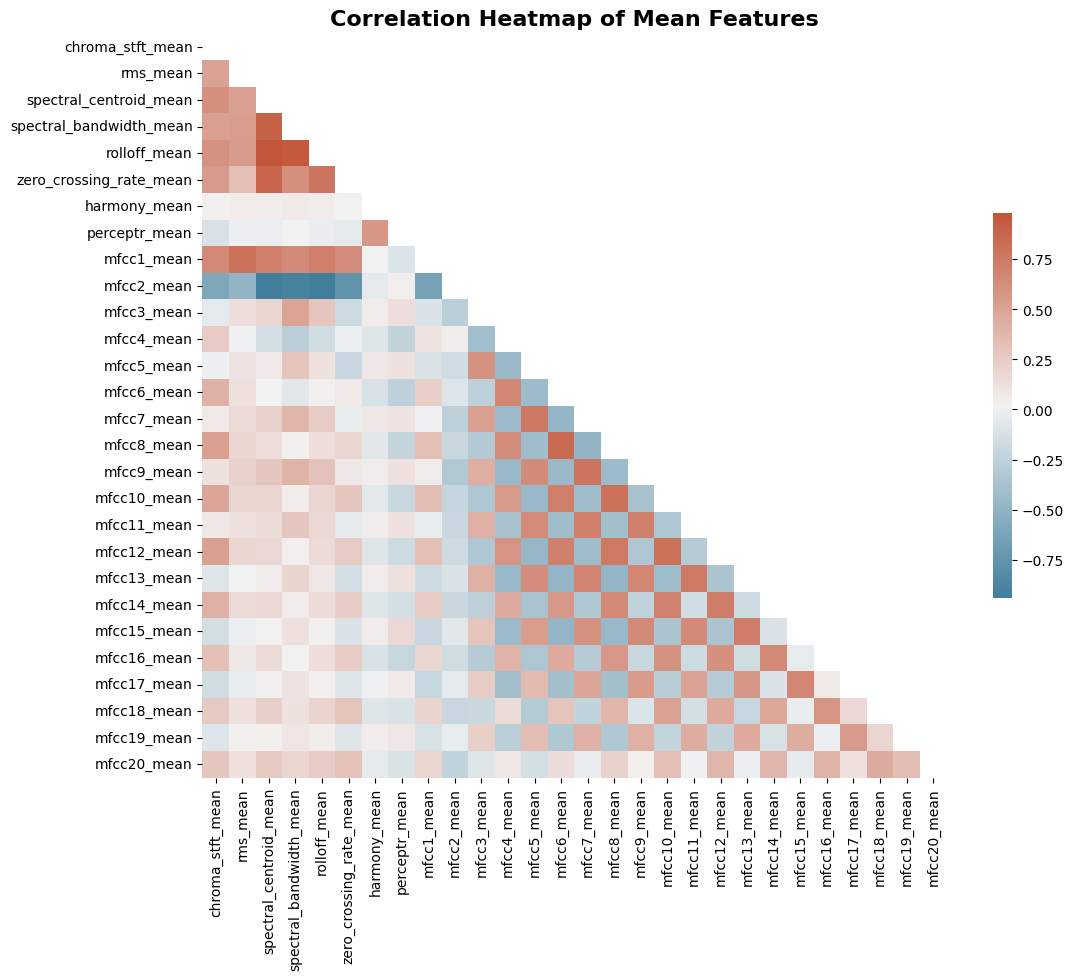

In [101]:
mean_columns = data_1.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, linewidths=0,
            cbar_kws={"shrink": .5}, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap of Mean Features', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

/tmp/ipykernel_21270/99709980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="label", y="tempo", data=x, palette='husl')


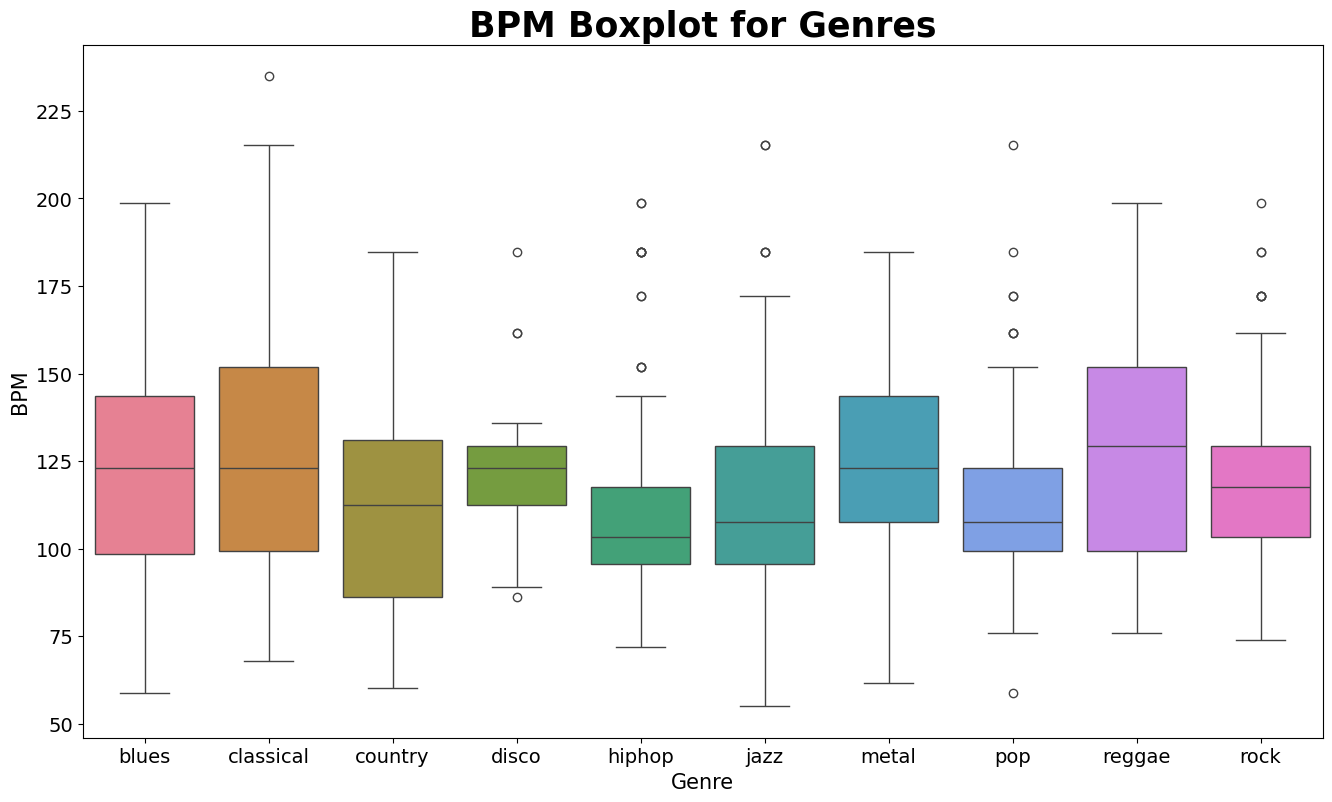

In [102]:
x = data_1[["label", "tempo"]]

# Create the plot
f, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="label", y="tempo", data=x, palette='husl')

# Styling the plot with titles and labels
plt.title('BPM Boxplot for Genres', fontsize=25, fontweight='bold')
plt.xlabel("Genre", fontsize=15)
plt.ylabel("BPM", fontsize=15)

# Setting the font size for x and y ticks for better readability
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show the plot
plt.show()

In [103]:
data = data_1.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']


#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

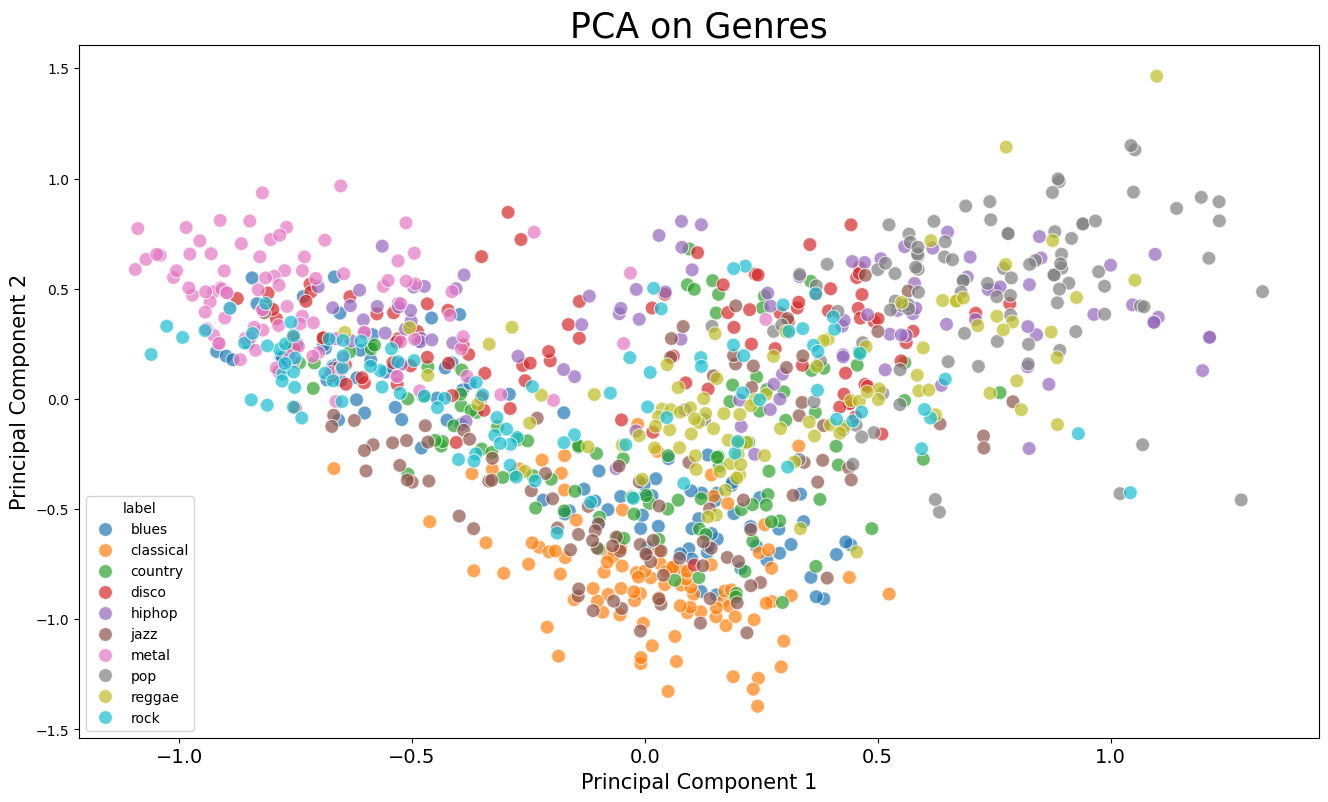

In [104]:


plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.show()



In [105]:


def plot_history(hist):
    plt.figure(figsize=(25,15))
    fig, axs = plt.subplots(2)
    # accuracy subplot
    axs[0].plot(hist.history["accuracy"], label="train accuracy")
    axs[0].plot(hist.history["val_accuracy"], label="test accuracy")    
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")

    
    # Error subplot
    axs[1].plot(hist.history["loss"], label="train error")
    axs[1].plot(hist.history["val_loss"], label="test error")    
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    
    
    plt.show()



In [106]:
data=data_1.drop(["perceptr_mean","perceptr_var"], axis=1)
# data=data_1
print(data.shape)
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, 
                                                    random_state = 42)
X.shape,y.shape


(1000, 58)


((1000, 56), (1000,))

In [107]:
labelencoder = LabelEncoder()
y_train = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)
len(labelencoder.classes_)
label_to_encoded = {class_label: index for index, class_label in enumerate(labelencoder.classes_)}

print(label_to_encoded)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}


In [108]:


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape



(800, 56)

In [109]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [110]:
param_dist_svm = {
    'C': uniform(1e-4, 1e+1),  
    'kernel': ['linear', 'rbf']
}
svm = SVC(random_state=42)
random_search_svm = RandomizedSearchCV(
    svm, param_distributions=param_dist_svm, n_iter=50,  
    scoring='accuracy', n_jobs=-1, random_state=42  
)
random_search_svm.fit(X_train, y_train)

# Evaluate the SVM model with the best parameters on the test set
best_svm = random_search_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Evaluate the SVM model on the training set
y_train_pred_svm = best_svm.predict(X_train)
train_accuracy_svm = accuracy_score(y_train, y_train_pred_svm)

print("Train SVM Accuracy:", train_accuracy_svm)
print("Test SVM Accuracy:", test_accuracy_svm)

Train SVM Accuracy: 0.9625
Test SVM Accuracy: 0.72


In [111]:
param_dist_rf = {
    'n_estimators': randint(10, 101),  # Reduced upper limit for faster computation
    'max_features': ['auto', 'sqrt'],  # Simplified choice of max features
    'max_depth': randint(1, 31),  # Controlled tree depth
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True]  # Consistent use of bootstrapping
}

# Create the Random Forest classifier and randomized search object
rf = RandomForestClassifier(random_state=42)
random_search_rf = RandomizedSearchCV(
    rf, param_distributions=param_dist_rf, n_iter=50,  # Optimized iteration count
    scoring='accuracy', n_jobs=-1, random_state=42  # Efficient resource usage
)

# Fit the randomized search to the data
random_search_rf.fit(X_train, y_train)

# Evaluate the Random Forest model with the best parameters on the test set
best_rf = random_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Evaluate the Random Forest model on the training set
y_train_pred_rf = best_rf.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)

print("Train RF Accuracy:", train_accuracy_rf)
print("Test RF Accuracy:", test_accuracy_rf)

/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
41 fits failed with the following error:
Traceback (most recent call last):
  File "/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/sklearn/base.py", line 666, in _v

Train RF Accuracy: 0.9975
Test RF Accuracy: 0.745


In [112]:
param_grid = {
    'n_neighbors': randint(1, 15),  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function
    'p': [1, 2]  # Power parameter for the Minkowski distance metric
}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform the random search
random_search_knn = RandomizedSearchCV(
    knn, param_distributions=param_grid, n_iter=10, cv=5, random_state=42
)
random_search_knn.fit(X_train, y_train)

# Evaluate the KNN model with the best parameters on the test set
best_knn = random_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Evaluate the KNN model on the training set
y_train_pred_knn = best_knn.predict(X_train)
train_accuracy_knn = accuracy_score(y_train, y_train_pred_knn)

print("Train KNN Accuracy:", train_accuracy_knn)
print("Test KNN Accuracy:", test_accuracy_knn)

Train KNN Accuracy: 0.99875
Test KNN Accuracy: 0.695


In [113]:
model = Sequential()
model.add(Dense(units=256, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=len(np.unique(y_train)), activation='softmax'))  
model.summary()

/home/kushagra/Documents/code/AI/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-26 16:07:51.139297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-26 16:07:51.140105: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        14,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 214,538 (838.04 KB)

 Trainable params: 214,538 (838.04 KB)

 Non-trainable params: 0 (0.00 B)

In [114]:
adam = optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=32,verbose=2, 
                    validation_data=(X_test, y_test))


Epoch 1/100
25/25 - 3s - 127ms/step - accuracy: 0.1550 - loss: 2.2916 - val_accuracy: 0.2900 - val_loss: 2.1995
Epoch 2/100
25/25 - 0s - 8ms/step - accuracy: 0.2525 - loss: 2.1526 - val_accuracy: 0.3100 - val_loss: 2.1014
Epoch 3/100
25/25 - 0s - 7ms/step - accuracy: 0.3400 - loss: 2.0238 - val_accuracy: 0.3150 - val_loss: 1.9855
Epoch 4/100
25/25 - 0s - 7ms/step - accuracy: 0.3688 - loss: 1.8895 - val_accuracy: 0.3100 - val_loss: 1.8627
Epoch 5/100
25/25 - 0s - 8ms/step - accuracy: 0.3762 - loss: 1.7611 - val_accuracy: 0.3850 - val_loss: 1.7426
Epoch 6/100
25/25 - 0s - 8ms/step - accuracy: 0.4300 - loss: 1.6502 - val_accuracy: 0.4300 - val_loss: 1.6384
Epoch 7/100
25/25 - 0s - 7ms/step - accuracy: 0.4625 - loss: 1.5572 - val_accuracy: 0.4450 - val_loss: 1.5582
Epoch 8/100
25/25 - 0s - 7ms/step - accuracy: 0.5100 - loss: 1.4324 - val_accuracy: 0.4600 - val_loss: 1.4927
Epoch 9/100
25/25 - 0s - 7ms/step - accuracy: 0.5300 - loss: 1.3808 - val_accuracy: 0.4900 - val_loss: 1.4317
Epoch 10

Training accuracy: 0.9112499952316284
Test accuracy: 0.7250000238418579


<Figure size 2500x1500 with 0 Axes>

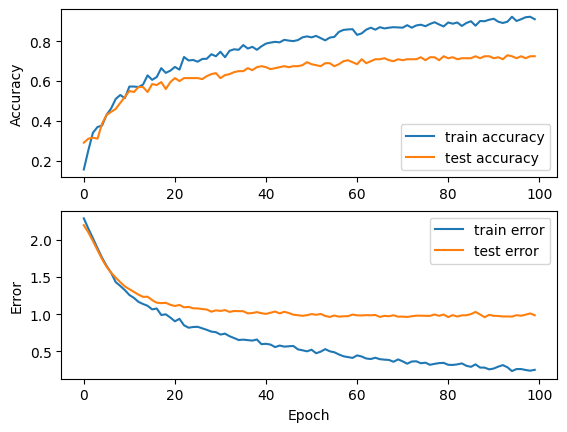

In [115]:
train_accuracy = history.history['accuracy'][-1]  # Last epoch accuracy
test_accuracy = history.history['val_accuracy'][-1]  # Last epoch validation accuracy

# Print accuracies
print('Training accuracy:', train_accuracy)
print('Test accuracy:', test_accuracy)
plot_history(history)

In [116]:
import pandas as pd



accuracy_df = pd.DataFrame({"Models": ["SVM", "RandomForestClassifier", "KNN", "ANN"], "traning_acc":[train_accuracy_svm,train_accuracy_rf,train_accuracy_knn,train_accuracy],
                            "test_accuracy":[test_accuracy_svm,test_accuracy_rf,test_accuracy_knn,test_accuracy]})
accuracy_df

,Models,traning_acc,test_accuracy
0,SVM,0.96250,0.720
1,RandomForestClassifier,0.99750,0.745
2,KNN,0.99875,0.695
3,ANN,0.91125,0.725


In [117]:
import joblib 
joblib.dump(best_rf, 'best_rf_model.pkl')

['best_rf_model.pkl']